In [28]:
from data_helper import get_train_dataset, get_test_dataset, visualize

In [29]:
type = "bare"

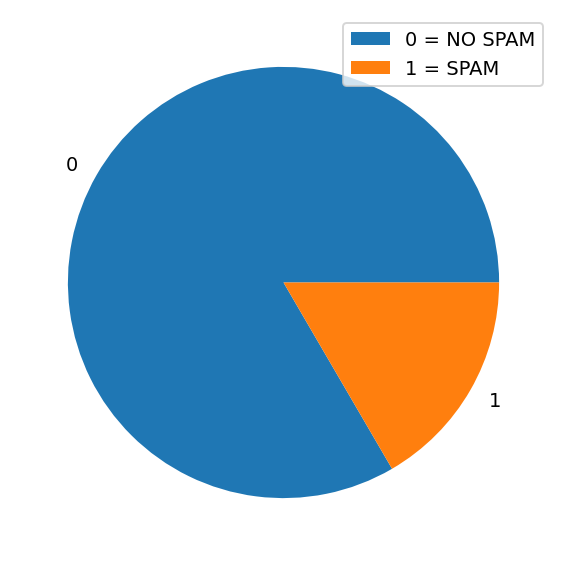

In [30]:
train_df = get_train_dataset(type)
visualize(train_df)

In [31]:
print(f"NOT SPAM: {train_df['is_spam'].value_counts()[0]}")
print(f"SPAM: {train_df['is_spam'].value_counts()[1]}")
print(f"NOT SPAM PERCENTAGE: {train_df['is_spam'].value_counts()[0] / len(train_df) * 100}%")
print(f"SPAM PERCENTAGE: {train_df['is_spam'].value_counts()[1] / len(train_df) * 100}%")

NOT SPAM: 2170
SPAM: 432
NOT SPAM PERCENTAGE: 83.39738662567257%
SPAM PERCENTAGE: 16.60261337432744%


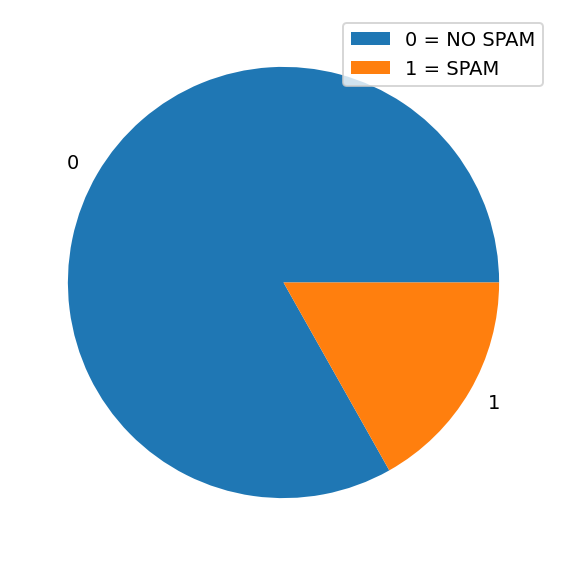

In [32]:
test_df = get_test_dataset(type)
visualize(test_df)

In [33]:
print(f"NOT SPAM: {test_df['is_spam'].value_counts()[0]}")
print(f"NOT SPAM PERCENTAGE: {test_df['is_spam'].value_counts()[0] / len(test_df) * 100}%")
print(f"SPAM: {test_df['is_spam'].value_counts()[1]}")
print(f"SPAM PERCENTAGE: {test_df['is_spam'].value_counts()[1] / len(test_df) * 100}%")

NOT SPAM: 242
NOT SPAM PERCENTAGE: 83.16151202749141%
SPAM: 49
SPAM PERCENTAGE: 16.83848797250859%


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

In [35]:
X_train = train_df.cleaned
X_test = test_df.cleaned

Y_train = train_df.is_spam
Y_test = test_df.is_spam

In [36]:
X_train = np.array(X_train).reshape(-1, 1)
Y_train = np.array(Y_train)

X_test = np.array(X_test).reshape(-1, 1)
Y_test = np.array(Y_test)

In [37]:
from ID3Classifier import ID3Classifier

classifier = ID3Classifier()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)

print(confusion_matrix(predictions,Y_test))
print("Accuracy : ", accuracy_score(predictions,Y_test))
print("Precision : ", precision_score(predictions,Y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions,Y_test, average = 'weighted'))

[[217  21]
 [ 25  28]]
Accuracy :  0.8419243986254296
Precision :  0.837453393217217
Recall :  0.8419243986254296


LEAVE ONE OUT

In [42]:
import pandas as pd
from data_helper import cleanup_df, read_data_part

In [53]:
def leave_one_out(leave_index):
    train_df = pd.DataFrame(columns=["subject", "message", "is_spam"])
    test_df = pd.DataFrame(columns=["subject", "message", "is_spam"])

    for i in range(1, 11):
        if i != leave_index:
            train_df = train_df.append(read_data_part(type, i), ignore_index=True)
        else:
            test_df = test_df.append(read_data_part(type, i), ignore_index=True)

    train_df = cleanup_df(train_df)
    test_df = cleanup_df(test_df)

    X_train = train_df.cleaned
    X_test = test_df.cleaned

    Y_train = train_df.is_spam
    Y_test = test_df.is_spam

    X_train = np.array(X_train).reshape(-1, 1)
    Y_train = np.array(Y_train)

    X_test = np.array(X_test).reshape(-1, 1)
    Y_test = np.array(Y_test)

    from ID3Classifier import ID3Classifier

    classifier = ID3Classifier()
    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)

    print(confusion_matrix(predictions,Y_test))
    print("Accuracy : ", accuracy_score(predictions,Y_test))
    print("Precision : ", precision_score(predictions,Y_test, average = 'weighted'))
    print("Recall : ", recall_score(predictions,Y_test, average = 'weighted'))  
    print()


In [55]:
for leave in range(1, 11):
    print(f"LEAVE {leave}")
    leave_one_out(leave)    

LEAVE 1
[[210  24]
 [ 31  24]]
Accuracy :  0.8096885813148789
Precision :  0.8006934772932849
Recall :  0.8096885813148789

LEAVE 2
[[214  28]
 [ 27  20]]
Accuracy :  0.8096885813148789
Precision :  0.81131937764122
Recall :  0.8096885813148789

LEAVE 3
[[210  29]
 [ 31  19]]
Accuracy :  0.7923875432525952
Precision :  0.7890966369462111
Recall :  0.7923875432525952

LEAVE 4
[[214  22]
 [ 27  26]]
Accuracy :  0.8304498269896193
Precision :  0.8244584751156993
Recall :  0.8304498269896193

LEAVE 5
[[221  25]
 [ 21  23]]
Accuracy :  0.8413793103448276
Precision :  0.8473662961907477
Recall :  0.8413793103448276

LEAVE 6
[[216  19]
 [ 25  29]]
Accuracy :  0.8477508650519031
Precision :  0.8416865281626442
Recall :  0.8477508650519031

LEAVE 7
[[225  23]
 [ 16  25]]
Accuracy :  0.8650519031141869
Precision :  0.8750499528588589
Recall :  0.8650519031141869

LEAVE 8
[[220  32]
 [ 21  16]]
Accuracy :  0.8166089965397924
Precision :  0.8386672218313735
Recall :  0.8166089965397924

LEAVE 9
[[